#Notebook: Deteccion Fuentes
###Por: Maria Camila Remolina Gutiérrez

En este notebook se detectan las fuentes para la media

In [3]:
%pylab inline
import sep #http://sep.readthedocs.org/
import os 
from astropy.io import fits

Populating the interactive namespace from numpy and matplotlib


In [4]:
#Paths
path_deteccion = './imagenes/deteccion_fuentes/'
path_supernova = './data/supernova/'

In [5]:
visita = fits.open('./imagenes/graficas/media.fits')

data = visita[0].data

visita.close()

shape_data = shape(data)
print shape_data

(1200, 1200)


In [6]:
#Background

try:
    bkg = sep.Background(data)
except ValueError:
    data = data.byteswap().newbyteorder()
    bkg = sep.Background(data)

In [7]:
#Source detection

thresh = 2.0 * bkg.globalrms
objects = sep.extract(data, thresh) # objects is a numpy structured array

num_objects = len(objects)
print num_objects # number of objects

25


In [8]:
objects_x = []
objects_y = []

for i in range(num_objects):
    x = objects['x'][i]
    y = objects['y'][i]
    
    objects_x.append(x)
    objects_y.append(y)
    
objects_x = array(objects_x)
objects_y = array(objects_y)

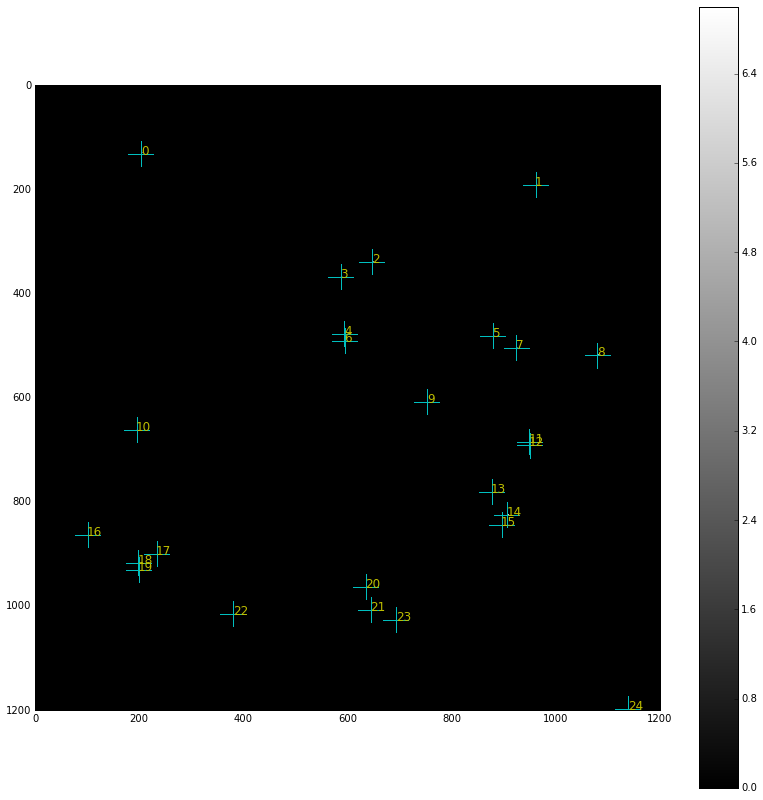

In [9]:
x_max = shape_data[0]
y_max = shape_data[1]

fig = figure(figsize=(14,14))
imshow(data, cmap='gray',vmin=0,vmax=7)
colorbar()

for i in range(len(objects)):
    x = objects_x[i]
    y = objects_y[i]
    
    porc_x = x/float(x_max)
    porc_y = 1-y/float(y_max)
    
    axvline(x,porc_y-0.02,porc_y+0.02,c='c')
    axhline(y,porc_x-0.02,porc_x+0.02,c='c') 
    text(x+1,y+1,str(i),color='y',fontsize=12)
    
savefig(path_deteccion+'fuentes.png', bbox_inches='tight')
show()
close()

#Curvas de luz

In [16]:
supernovas = sort(os.listdir(path_supernova))
num_supernovas = len(supernovas)

print supernovas

['+1.fits' '+3.fits' '-1,2.fits' '-2,2.fits' '-3.fits' '-4.fits' '0.fits']


In [17]:
objects_x_int = array([int(ox) for ox in objects_x])
objects_y_int = array([int(oy) for oy in objects_y])

In [18]:
curvas = zeros((num_objects,num_supernovas))

In [19]:
for s in range(num_supernovas):
            
    supernova_i = fits.open(path_supernova+supernovas[s])
    ccd14 = supernova_i[1].data
    ccd14 = ccd14*60000/amax(ccd14) #Normalizando, no estoy segura si debería ir ahi
       
    for i in range(num_objects):
        
        columna = objects_x_int[i]
        fila = objects_y_int[i]
        
        pixel = ccd14[fila][columna]
            
        curvas[i][s] = pixel

    supernova_i.close()

In [33]:
sup = arange(num_supernovas)

for i in range(num_objects):
    intensidad = curvas[i][:]
    intensidad_to_plot = []
    
    #['+1.fits' '+3.fits' '-1,2.fits' '-2,2.fits' '-3.fits' '-4.fits' '0.fits']
    #[5,4,3,2,6,0,1],['-4', '-3', '-2,2', '-1,2', '0','+1', '+3']
    for j in [5,4,3,2,6,0,1]:
        intensidad_to_plot.append(intensidad[j])
    
    fig = figure(figsize=(20,10))
    
    plot(sup,intensidad_to_plot,color='c')
    scatter(sup,intensidad_to_plot)
      
    xticks([0,1,2,3,4,5,6],['-4', '-3', '-2,2', '-1,2', '0','+1', '+3'])
    xlabel('Visita',fontsize=20)
    ylabel('Intensidad',fontsize=20)
    xlim(0,num_supernovas-1)
    ylim(-100,55000)
    
    savefig(path_deteccion+'curvas_de_luz/'+str(i)+'.png')
    close()

#Curva sobre fuentes

In [37]:
for i in range(num_objects):

    fila = objects_y_int[i]
    columna = objects_x_int[i]
    
    arreglo_pixel = zeros(23)
    arreglo_intensidad = zeros(23)
    indice_arreglos = 0
    
    if (fila-12 < 0):
        for lin in range(0,fila+11+1):
            pixel = data[lin][columna]
            arreglo_pixel[indice_arreglos] = lin
            arreglo_intensidad[indice_arreglos] = pixel
            indice_arreglos += 1
            
    elif (fila+12 > shape_data[1]):
        for lin in range(fila-11,shape_data[1]):
            pixel = data[lin][columna]
            arreglo_pixel[indice_arreglos] = lin
            arreglo_intensidad[indice_arreglos] = pixel
            indice_arreglos += 1

    else:
        for lin in range(fila-11,fila+11+1):
            pixel = data[lin][columna]
            arreglo_pixel[indice_arreglos] = lin
            arreglo_intensidad[indice_arreglos] = pixel
            indice_arreglos += 1
    
    fig = figure(figsize=(20,10))
    plot(arreglo_pixel,arreglo_intensidad,color='c')
    scatter(arreglo_pixel,arreglo_intensidad)
    xlabel('Pixel',fontsize=20)
    ylabel('Intensidad',fontsize=20)
    ylim(-10,40000)
    savefig(path_deteccion+'curvas_sobre_fuentes/'+str(i)+'.png')
    close()